# Olist's Metric Design 

A first glimpse into `Olist's business health` is done

In [1]:
# Modules are imported
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data is loaded
from olist.data import Olist
data = Olist().get_data()

## 1 - Orders vs. Reviews?

❓ Histogram of `review_score` is plotted. 

<AxesSubplot:xlabel='review_score', ylabel='Count'>

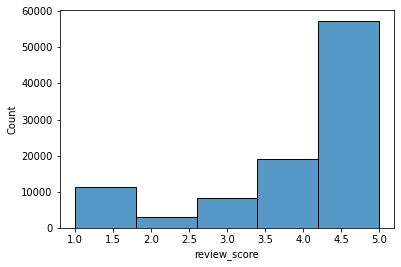

In [3]:
sns.histplot(data["order_reviews"]["review_score"], bins = 5)

❓ Histogram of `order_status` is plotted<br/>

/home/chongxe1991/.pyenv/versions/3.8.12/envs/ddi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


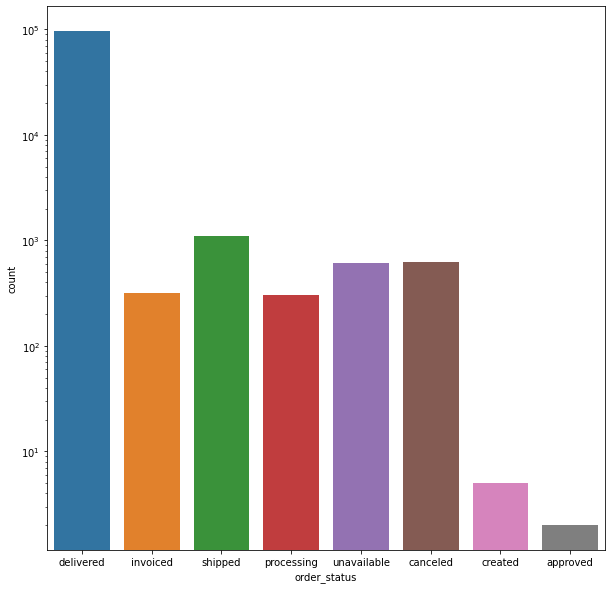

In [4]:
plt.figure(figsize = (10,10))
a = sns.countplot(data["orders"]["order_status"])
a.set_yscale("log")

❓ How many of them are delivered ? shipped ? canceled ? ...

In [5]:
orders = data["orders"]

In [6]:
x = [item for item in data["orders"]["order_status"].unique()]
orders = data["orders"]
dict1 = {}
for item in x:
    dict1[item] = orders[orders["order_status"] == item].count()["order_id"]
dict1

{'delivered': 96478,
 'invoiced': 314,
 'shipped': 1107,
 'processing': 301,
 'unavailable': 609,
 'canceled': 625,
 'created': 5,
 'approved': 2}

💡 From our data schema, we know - that each `review` has a unique `order`.

🤔 Do all `orders` have a `review`?

<details>
    <summary><i>▸ Details</i></summary>

`pd.Series.isna().sum()` is used to count the number of NaN values in the series
</details>

In [7]:
merged_df = data["orders"].merge(data["order_reviews"], on = "order_id", how = "left")
merged_df["review_id"].isna().sum()

768

The orders that were not reviewed are counted and grouped by `order_status`.

In [8]:
merged_df[merged_df["review_id"].isna() == True].groupby("order_status").size()

order_status
canceled        20
created          2
delivered      646
invoiced         5
processing       6
shipped         75
unavailable     14
dtype: int64

## 2 - Evolution of key business metrics over the past 14 months

## Metrics 

1. Which metric should be used as a `key business output metric`for Olist  📈 ? 
2.  Which metric should be used to measure that a customer had a `good experience with Olist` 🙂 ? 
3. Which metric should be used to measure `shipping delay` 🕗?

For each metric, a trend line is plotted over time.

### Metric 1: Order numbers

❓ The weekly number of total orders per week is plotted (to check how business is going)  


In [9]:
total_orders_per_week = pd.to_datetime(data["orders"]["order_purchase_timestamp"]).dt.isocalendar().groupby(["year", "week"]).count()
total_orders_per_week = total_orders_per_week.reset_index()

In [10]:
total_orders_per_week["year_week"] = total_orders_per_week["year"].apply(lambda x: str(x)) + "." + total_orders_per_week["week"].apply(lambda x: str(x))

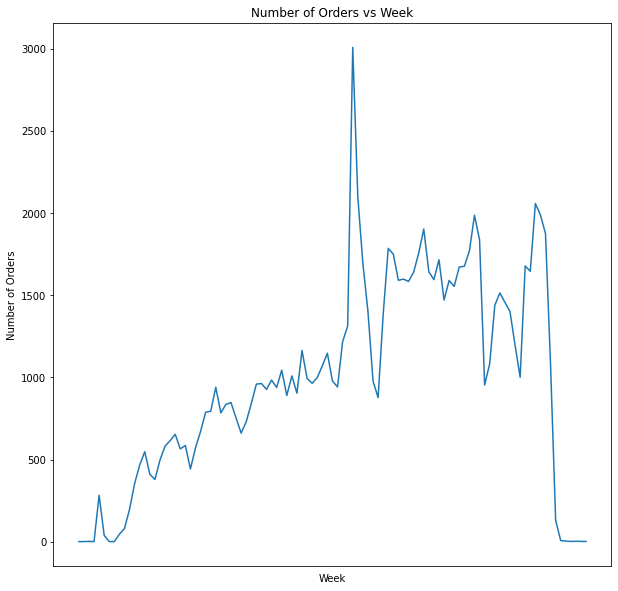

In [11]:
plt.figure(figsize = (10, 10))
plt.plot("year_week", "day", data = total_orders_per_week)
plt.xticks([])
plt.xlabel("Week")
plt.ylabel("Number of Orders")
plt.title("Number of Orders vs Week");

❓ The weekly number of non-delivered orders is visualised (to check for any potential issues)

In [12]:
potential_issues_orders = data["orders"][data["orders"]["order_status"] != "delivered"]

In [13]:
potential_issues_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [14]:
potential_issues_orders_per_week = pd.to_datetime(potential_issues_orders["order_purchase_timestamp"]).dt.isocalendar().groupby(["year", "week"]).count()
potential_issues_orders_per_week = potential_issues_orders_per_week.reset_index()

In [15]:
potential_issues_orders_per_week

,year,week,day
0,2016,35,1
1,2016,36,1
2,2016,37,1
3,2016,39,1
4,2016,40,52
...,...,...,...
95,2018,37,4
96,2018,38,2
97,2018,39,3
98,2018,40,2


In [16]:
potential_issues_orders_per_week["year_week"] = potential_issues_orders_per_week["year"].apply(lambda x: str(x)) + "." + potential_issues_orders_per_week["week"].apply(lambda x: str(x))

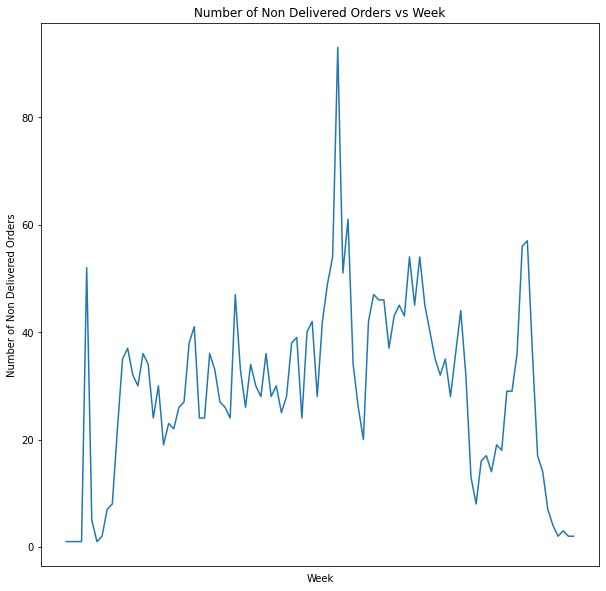

In [17]:
plt.figure(figsize = (10, 10))
plt.plot("year_week", "day", data = potential_issues_orders_per_week)
plt.xticks([])
plt.xlabel("Week")
plt.ylabel("Number of Non Delivered Orders")
plt.title("Number of Non Delivered Orders vs Week");

### Metric 1-bis (optional): Total payment values
❓ After plotting the total number of orders, the weekly sum of `payment_value` in `BRL` is visualised to approximate Olist's weekly revenues.

💡 The `payments` dataset is merged with the `orders` dataset to collect the date of each payment.

In [18]:
order_merge_payments = data["orders"].merge(data["order_payments"], on = "order_id", how = "left")

In [19]:
order_merge_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12


⌛️ Datetimes are handled

In [20]:
order_merge_payments[["year", "week", "day"]] = pd.to_datetime(order_merge_payments["order_purchase_timestamp"]).dt.isocalendar()

In [21]:
payment_collection_per_week = order_merge_payments.groupby(["year", "week"]).sum()

In [22]:
payment_collection_per_week = payment_collection_per_week.reset_index()

In [23]:
payment_collection_per_week["year_week"] = payment_collection_per_week["year"].apply(lambda x: str(x)) + "." + payment_collection_per_week["week"].apply(lambda x: str(x))

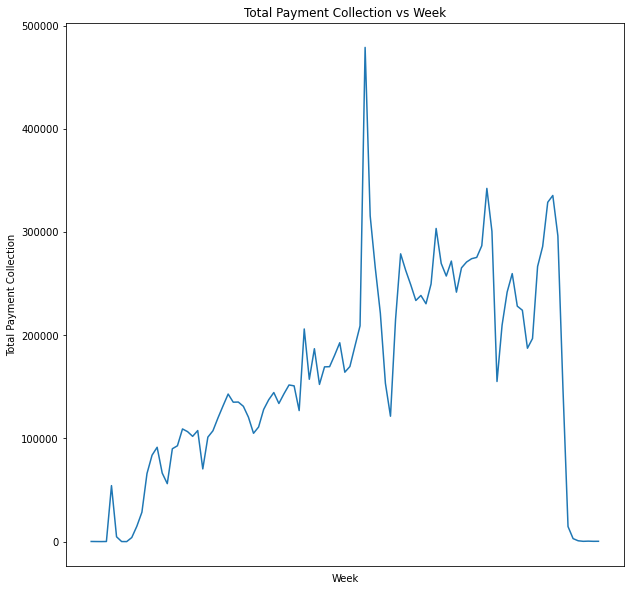

In [24]:
plt.figure(figsize = (10, 10))
plt.plot("year_week", "payment_value", data = payment_collection_per_week)
plt.xticks([])
plt.xlabel("Week")
plt.ylabel("Total Payment Collection")
plt.title("Total Payment Collection vs Week");

📈 Visualize the number of orders and total amount of payments per week

In [25]:
# YOUR CODE HERE

📈 *(Optional)* Plot the weekly number of orders and payments again with techniques you learned during the `Data Visualization` module :)

In [26]:
# YOUR CODE HERE

### Metric 2: Customer Satisfaction
❓ How does the `customer satisfaction` evolve on a monthly basis ? Use the mean average `review_score` to illustrate the customer satisfaction.

👉 Load the `reviews` :

In [27]:
# YOUR CODE HERE

⌛️ If you need to handle datetime, do it.

In [28]:
# YOUR CODE HERE

📉 Plot the customer satisfaction evolution over time

In [29]:
# YOUR CODE HERE

📉 *(Optional)* Plot the customer satisfaction evolution over time again with techniques you learned during the Data Visualization module :)

In [30]:
# YOUR CODE HERE

### Metric 3: Shipping delay

❓Create two new metrics, `delay_vs_expected` and `wait_time` in ***days***, from the `orders` dataset, and plot their historical evolution on a weekly basis to detect trends

<details>
    <summary>▸ <i>Hint</i></summary>

    
Ask `StackOverflow` to help you compute differences between `datetime`s in Python!
</details>

🛒 Let's focus on delivered orders so that we can compute the shipping delays:

In [31]:
# YOUR CODE HERE

⌛️ Datetime problems again ? Fix them ;)

In [32]:
# YOUR CODE HERE

👉 Compute the delay between the actual delivery date and the ETA for each order.

In [33]:
# YOUR CODE HERE

👉 Compute the waiting time between the actual delivery date and the moment a customer ordered their items

In [34]:
# YOUR CODE HERE

⌛️ How many orders were delivered later than expected ? <br/>
*You can also give an answer in terms of percentage if you prefer.*
<details>
    <summary><i>▸ Hint </i></summary>

    
You can create a `boolean_feature` which is :
* True when actual_delivered_date > ETA $\leftrightarrow$ actual_delivered_date - ETA > 0
* False otherwise
    
</details>




In [35]:
# YOUR CODE HERE

* On average, 8% of the orders are delivered after the ETA ⌛️

* Let's find which weeks were the worst 👇
    1. Aggregate the dataset per week
    2. Compute the percentage of orders delivered lately each week

In [36]:
# YOUR CODE HERE

📈 Plot the `number of delays` and `percentage of delayed orders` per week

In [37]:
# YOUR CODE HERE

#### Delay Analysis

📈 📉 From the previous graph, Olist experienced major lateness issues on 3-4 weeks ⚠️...

👉 Let's deep dive into these peaks of lateness.

❓ Create a dataframe (with weeks as indexes ) with the following columns:
* number of delays
* number of orders
* percentage of delayed orders

In [38]:
# YOUR CODE HERE

❓ Create sub-dataframes to seperate these weeks into subgroups.

A suggestion:
- 20% and more
- 15-20%
- 10-15%
- 5-10%
- 5% and less